# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [38]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
from scipy.stats import kstest,norm, levene

plt.style.use('ggplot')

%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [12]:
print df_raw.count()

print

print df_raw.shape


admit       400
gre         398
gpa         398
prestige    399
dtype: int64

(400, 4)


Answer: There are 400 rows of 4 variables each.

#### Question 2. Create a summary table

In [ ]:
#function

In [14]:
df_raw.describe()

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer:GRE has a range from 800.00 to 220.00 while GPA is ranging from 4.00 to 2.26. GRE has a larger variance in scores than GPA.

#### Question 4. Drop data points with missing data


In [60]:
admit_dt = df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [21]:
print 'Before pd.isnull()'
print pd.isnull(df_raw).sum()
print 'dimensions:'+' ' + str(df_raw.shape)
print
print
print 'After pd.isnull()'
print pd.isnull(admit_dt).sum()
print 'dimensions:'+ ' ' + str(admit_dt.shape)

Before pd.isnull()
admit       0
gre         2
gpa         2
prestige    1
dtype: int64
dimensions: (400, 4)


After pd.isnull()
admit       0
gre         0
gpa         0
prestige    0
dtype: int64
dimensions: (397, 4)


#### Question 6. Create box plots for GRE and GPA

In [23]:
#boxplot 1 : GRE

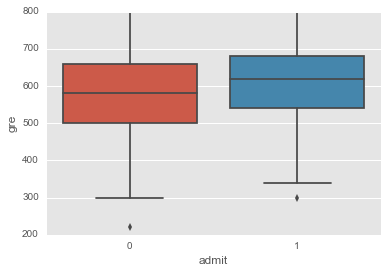

In [34]:
sns.boxplot(x = 'admit', y = 'gre', data = admit_dt)

In [29]:
#boxplot 2: GPA

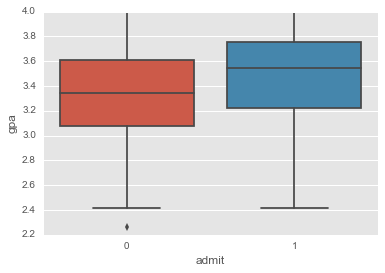

In [33]:
sns.boxplot(x = 'admit', y = 'gpa', data = admit_dt)

#### Question 7. What do this plots show?

Answer_GRE: Both the admitted and not addmitted contain outliers that could be removed. The admitted students have a higher mean and a possible smaller variance than those of non-admitted students. The range of scores is smaller for the admitted students. 

Answer_GPA: There is an outlier for the non admitted students that could be removed and may lessen the difference between the means. The mean of the admitted students is higher than that of the non admitted students. 

#### Question 8. Describe each distribution 

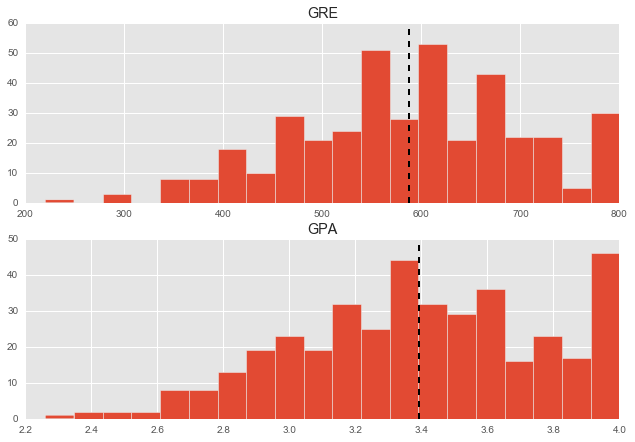

In [96]:
# plot the distribution of each variable 
fig = plt.figure()
fig.subplots_adjust(top = 1.5, right=1.5)

fig.add_subplot(2,1,1)
plt.hist(admit_dt.gre, 20)
plt.axvline(x=admit_dt.gre.mean(), c='black', ls='--', lw=2)
plt.title('GRE')

fig.add_subplot(2,1,2)
plt.hist(admit_dt.gpa,20)
plt.axvline(x=admit_dt.gpa.mean(), c='black', ls='--', lw=2)
plt.title('GPA')




##### GRE
The scores appear to evenly ditributed but might have two peaks which will affect normality, at lower number of bins the distribution appears negatively skewed. 

##### GPA
The distribution has two peaks with a spike around 3.3 and 4.0. This leads me to believe and test for normality. 


#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [86]:
print 'kstest for GRE'
print kstest(admit_dt.gre, 'norm')
print
print 'kstest for GPA'
print kstest(admit_dt.gpa, 'norm')

kstest for GRE
KstestResult(statistic=1.0, pvalue=0.0)

kstest for GPA
KstestResult(statistic=0.98972085476178895, pvalue=0.0)


Our analysis shows that there is not enough evidence (at the .05 sensitivity level) 
to support the null hypothesis of normality for GPA and GRE Scores 
and as a result we accept the alternative hypothesis of non-normality for GPA and GRE Scores.

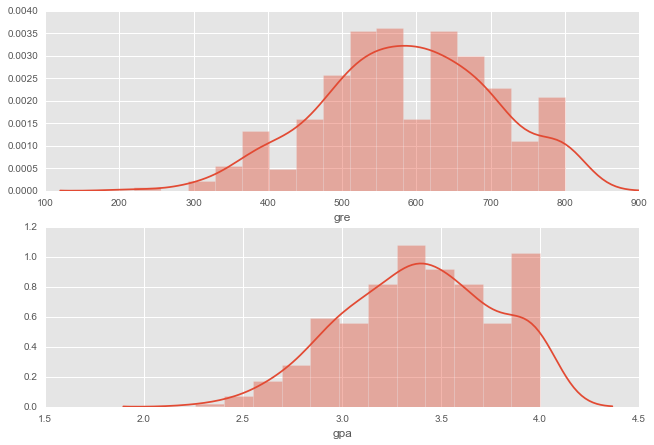

In [88]:
fig = plt.figure()
fig.subplots_adjust(top = 1.5, right=1.5)

fig.add_subplot(2,1,1)
sns.distplot(admit_dt.gre)

fig.add_subplot(2,1,2)
sns.distplot(admit_dt.gpa)

A better look at why the null hypothesis was rejected and the alternative hypothesis was accepted. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Depending on the analysis we are looking to perform will depend on if the distribution needs to be corrected. Generally, you will want to work with the distribution of the data, using the statistical test that fit your data, rather than fitting the data to a statisitical test. 

For a linear regression, which expects normality, we would need to correct the distribution by normalizing /standardizing the data. You could do this through a log transformation, new = (old -min)/(max-min), or new = (old - mean) / standard deviation. 

#### Question 11. Which of our variables are potentially colinear? 

In [59]:
# create a correlation matrix for the data
admit_dt.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: At 0.382408 GPA an GRE are the highest correlated. There isn't enought correlation between the two to worry about colinearity. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

1. Get an over view of the data, df.describe()
2. Create a table with counts for each prestige level as a column and a rows for admitted and discharged
3. Plot the data
4. Test for normality
5. Test for a difference in mean/median depending on the normality kstest(). 
6. Create a probability table for each. 
7. Run any modeling (regression, log regression, etc)


#### Question 14. What is your hypothesis? 

Answer: The higher the prestige of the undergrad alma mater will increase the likelihood of being admitted into grad school over the lower prestige alma maters. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data